In [2]:
!pip install grad-cam

  Using cached grad_cam-1.5.5-py3-none-any.whl
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
  Attempting uninstall: nvidia-cusolver-cu12
    Found existing installation: nvidia-cusolver-cu12 11.6.3.83
    Uninstalling nvidia-cusolver-cu12-11.6.3.83:
      Successfully uninstalled nvidia-cusolver-cu12-11.6.3.83


Saving epoch23_sample1_3d_voxel_comparison.png to epoch23_sample1_3d_voxel_comparison (1).png


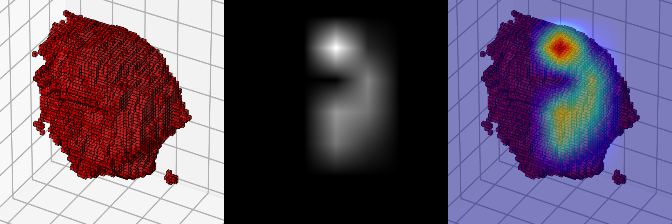

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Required libraries
from torchvision import models
import numpy as np
import cv2
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image


from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
img = np.array(Image.open(filename).convert("RGB"))
img = cv2.resize(img, (224, 224))
img = np.float32(img) / 255


input_tensor = preprocess_image(img, mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])

from torchvision.models import resnet50
model = resnet50(pretrained=True)
model.eval()

target_layers = [model.layer4]
targets = [ClassifierOutputTarget(295)]

# Run Grad-CAM
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cams = cam(input_tensor=input_tensor, targets=targets)
    cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb=True)

cam = np.uint8(255 * grayscale_cams[0, :])
cam = cv2.merge([cam, cam, cam])
combined = np.hstack((np.uint8(255 * img), cam, cam_image))

from IPython.display import display
display(Image.fromarray(combined))

